# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Just doing my standard imports

In [9]:
sat = pd.read_csv('../data/sat.csv')
act = pd.read_csv('../data/act.csv')

In [10]:
sat.head()

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055


In [11]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 2. Print the first ten rows of each dataframe.

In [12]:
# Looking at these two printouts, it seems that there are extra columns that we don't need. Let's drop those.
# The inplace argument makes the column drop permanent. If I did inplace=False, which is the default, the command 
# would output a dataframe without the Unnamed: 0 column, but it would not make those changes to the original
# dataframe. As a best practice you should run your command with inplace=False to make sure it is doing what you
# want it to do, and once you've verified that it is, run inplace=True.


sat.drop(labels='Unnamed: 0', axis=1, inplace=True)
act.drop(labels='Unnamed: 0', axis=1, inplace=True)

# Alternative solution:
# Notice that Pandas has created an "unnamed" column. That's because the CSV being imported has its own (unnamed) index column.
# In order to tell Pandas not to create a new index column, but to use the existing index column, you need
# to set the index_col parameter. In this case, and in most others, the index column in the CSV is the first one:

sat = pd.read_csv('../data/sat.csv', index_col = 0)
act = pd.read_csv('../data/act.csv', index_col = 0)

# After you import a dataset, you'll always want to inspect the first and last few rows of your dataframe to make sure
# that the data has been imported correctly. Very often, you'll make small changes to your pd.read_csv function
# call based on what you see. You may also change the default value separator, or tell Pandas to skip rows
# when reading in the data.

In [5]:
df.set_index("State").to_dict()["Evidence-Based Reading and Writing"]

{'Alabama': 593,
 'Alaska': 547,
 'Arizona': 563,
 'Arkansas': 614,
 'California': 531,
 'Colorado': 606,
 'Connecticut': 530,
 'Delaware': 503,
 'District of Columbia': 482,
 'Florida': 520,
 'Georgia': 535,
 'Hawaii': 544,
 'Idaho': 513,
 'Illinois': 559,
 'Indiana': 542,
 'Iowa': 641,
 'Kansas': 632,
 'Kentucky': 631,
 'Louisiana': 611,
 'Maine': 513,
 'Maryland': 536,
 'Massachusetts': 555,
 'Michigan': 509,
 'Minnesota': 644,
 'Mississippi': 634,
 'Missouri': 640,
 'Montana': 605,
 'Nebraska': 629,
 'Nevada': 563,
 'New Hampshire': 532,
 'New Jersey': 530,
 'New Mexico': 577,
 'New York': 528,
 'North Carolina': 546,
 'North Dakota': 635,
 'Ohio': 578,
 'Oklahoma': 530,
 'Oregon': 560,
 'Pennsylvania': 540,
 'Rhode Island': 539,
 'South Carolina': 543,
 'South Dakota': 612,
 'Tennessee': 623,
 'Texas': 513,
 'Utah': 624,
 'Vermont': 562,
 'Virginia': 561,
 'Washington': 541,
 'West Virginia': 558,
 'Wisconsin': 642,
 'Wyoming': 626}

##### 3. Describe in words what each variable (column) is.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [13]:
assert sat.isnull().sum().sum() == 0 
# No null values. Missing values could be encoded as, for example, 0 or 999. 

assert act.isnull().sum().all() == 0
assert sat.apply(lambda x: x == 0).sum().all() == 0    
assert act.apply(lambda x: x == 0).sum().all() == 0 
# There are no values of 0.

assert sat['Total'].all() <= 1600
assert act['Composite'].all() <= 36
# No scores above the maximum

assert sat.loc[:,['Reading and Writing','Math']].apply(lambda x: x > 800).sum().all() == 0
# No individual sat scores above 800

assert act.loc[:,['English','Math','Reading','Science']].apply(lambda x: x > 36).sum().all() == 0
# No individual sat scores above 36

assert sat.shape[0] == 51
assert act.shape[0] == 52
# Finally, we have observations for all 50 states and DC.
# For the ACT, we have the national average as well.


/Users/heatherrobbins/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]
/Users/heatherrobbins/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


##### 5. Print the types of each column.

In [14]:
print('SAT\n')
print(sat.dtypes,'\n')

print('ACT\n')
print(act.dtypes)

SAT

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object 

ACT

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [15]:
for dataset in [sat, act]:
    dataset.replace(to_replace='%',value='',inplace=True,regex=True)
    dataset['Participation'] = dataset['Participation'].astype('int')


In [ ]:
# sat.replace(to_replace='%',value='',inplace=True,regex=True)
# sat['Participation'] = sat['Participation'].astype('int')
# act.replace(to_replace='%',value='',inplace=True,regex=True)
# act['Participation'] = act['Participation'].astype('int')

In [16]:
# Now that we've turned 'Participation' into a numeric series:
assert sat['Participation'].max() <= 100
assert act['Participation'].max() <= 100
assert sat['Participation'].min() > 0
assert act['Participation'].min() > 0
# We can see there are no participation rates below 0% or above 100%

In [17]:
print('SAT\n')
print(sat.dtypes,'\n')

print('ACT\n')
print(act.dtypes)

SAT

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object 

ACT

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [18]:
sat_part = dict(zip(sat['State'],sat['Participation']))
sat_rw = dict(zip(sat['State'],sat['Evidence-Based Reading and Writing']))
sat_math = dict(zip(sat['State'],sat['Math']))

act_part = dict(zip(act['State'],act['Participation']))
act_eng = dict(zip(act['State'],act['English']))
act_math = dict(zip(act['State'],act['Math']))
act_read = dict(zip(act['State'],act['Reading']))
act_sci = dict(zip(act['State'],act['Science']))
act_part = dict(zip(act['State'],act['Participation']))

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [19]:
sat_dict = {key:value for (key,value) in sat.iteritems()}
act_dict = {key:value for (key,value) in act.iteritems()}

##### 9. Merge the dataframes on the state column.

In [20]:
tests = pd.merge(sat, act, on='State', suffixes=('_sat','_act'))

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [23]:
tests.columns = ['State', 'Participation_SAT', 'Reading and Writing_SAT', 'Math_SAT',
       'Total_SAT', 'Participation_ACT', 'English_ACT', 'Math_ACT', 'Reading_ACT',
       'Science_ACT', 'Composite_ACT']
tests.head()

,State,Participation_SAT,Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [25]:
tests.describe().loc[['min','max']]

,Participation_SAT,Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
min,2.0,482.0,52.0,950.0,8.0,16.3,18.0,18.1,2.3,17.8
max,100.0,644.0,651.0,1295.0,100.0,25.5,25.3,26.0,24.9,25.5


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [26]:
def my_std(series):
    # First compute the squared deviations from the mean
    sq_devs = [(x - series.mean()) ** 2 for x in series]
    # Then compute the average of those deviations:
    mean_dev = np.mean(sq_devs)
    # Then return the square root of the mean_deviations:
    return(np.sqrt(mean_dev))
           
sd = list(tests.loc[tests['State'] != 'National', tests.dtypes != object].apply(my_std).values)


## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [27]:
sd = ['Standard Deviation'] + sd
assert len(sd) == tests.shape[1]
tests.loc[51] = sd # Remember: I don't want standard deviation in my dataframe for plotting
tests.tail()

,State,Participation_SAT,Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
47,Washington,64.000000,541.00000,534.000000,1075.000000,29.000000,20.900000,21.900000,22.100000,22.000000,21.900000
48,West Virginia,14.000000,558.00000,528.000000,1086.000000,69.000000,20.000000,19.400000,21.200000,20.500000,20.400000
49,Wisconsin,3.000000,642.00000,649.000000,1291.000000,100.000000,19.700000,20.400000,20.600000,20.900000,20.500000
50,Wyoming,3.000000,626.00000,604.000000,1230.000000,100.000000,19.400000,19.800000,20.800000,20.600000,20.200000
51,Standard Deviation,34.929071,45.21697,84.072555,91.583511,31.824176,2.330488,1.962462,2.046903,3.151108,2.000786


In [28]:
tests.drop(51, inplace=True) # Immediately drop the sd row.

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [29]:
# I'm temporarily dropping the standard deviation row, because it doesn't make sense to sort that row.
tests.sort_values(by ='Participation_SAT', ascending = False).head(5)

,State,Participation_SAT,Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,24.1
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,25.5


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [32]:
tests[tests['Participation_SAT'] > .50] 

,State,Participation_SAT,Reading and Writing_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,20.8
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [33]:
plot_data = tests.loc[tests['State'] != 'National',]
plot_data = tests.loc[tests['State'] != 'Standard Deviation',]

##### 17. Plot the Math(s) distributions from both data sets.

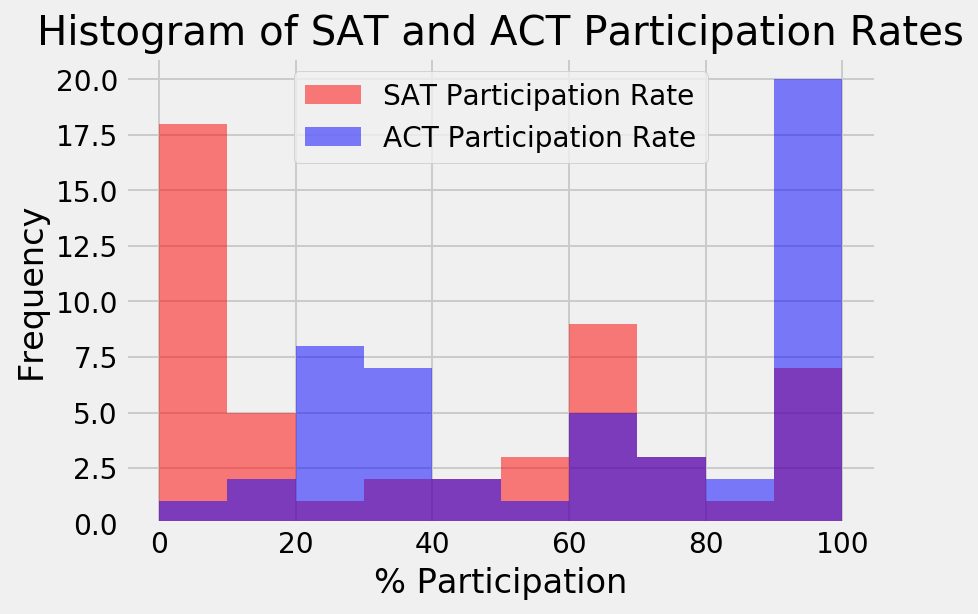

In [34]:
num_bins = 10 #Create bins common to each histogram

with plt.style.context(('fivethirtyeight')):
    tests['Participation_SAT'].plot(kind = 'hist', alpha = .5, color = 'red',
                                    bins = range(0,110,num_bins), label = 'SAT Participation Rate')
    tests['Participation_ACT'].plot(kind = 'hist', alpha = .5, color = 'blue',
                                    bins = range(0,110,num_bins), label = 'ACT Participation Rate')
    
    plt.title("Histogram of SAT and ACT Participation Rates")
    plt.xlabel("% Participation")
    plt.legend()
    
# If you want to see all the possible styles for matplotlib, you can run this code:
# print(plt.style.available)


##### 18. Plot the Verbal distributions from both data sets.

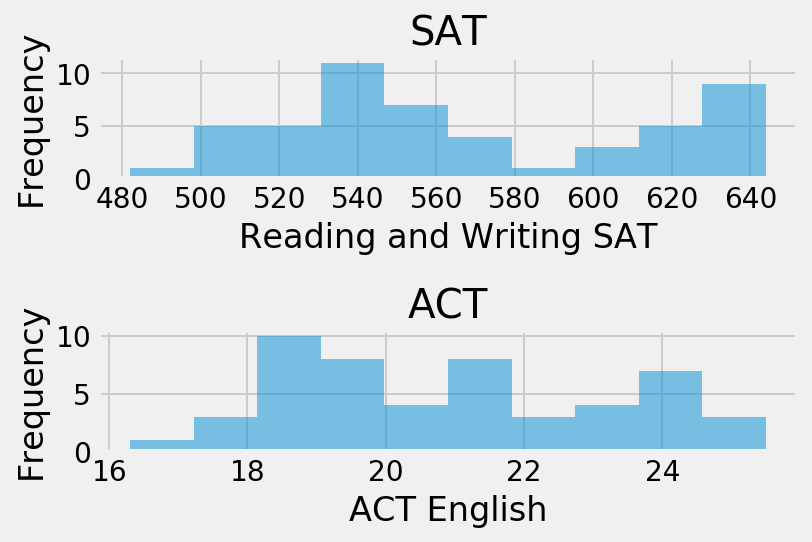

In [35]:
with plt.style.context(('fivethirtyeight')):
    
    ax1 = plt.subplot(211)
    tests['Reading and Writing_SAT'].plot(kind = 'hist', alpha = .5,
                                    bins = 10, label = 'SAT Reading and Writing')
    plt.title('SAT')
    plt.xlabel('Reading and Writing SAT')
    
    ax2 = plt.subplot(212)
    ax2 = tests['English_ACT'].plot(kind = 'hist', alpha = .5,
                                    bins = 10, label = 'ACT English')
    plt.title('ACT')
    plt.xlabel('ACT English')
    plt.tight_layout()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [36]:
#We normally assume that our data is normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

In [37]:
#It doesn't look like it.

##### 21. Plot some scatterplots examining relationships between all variables.

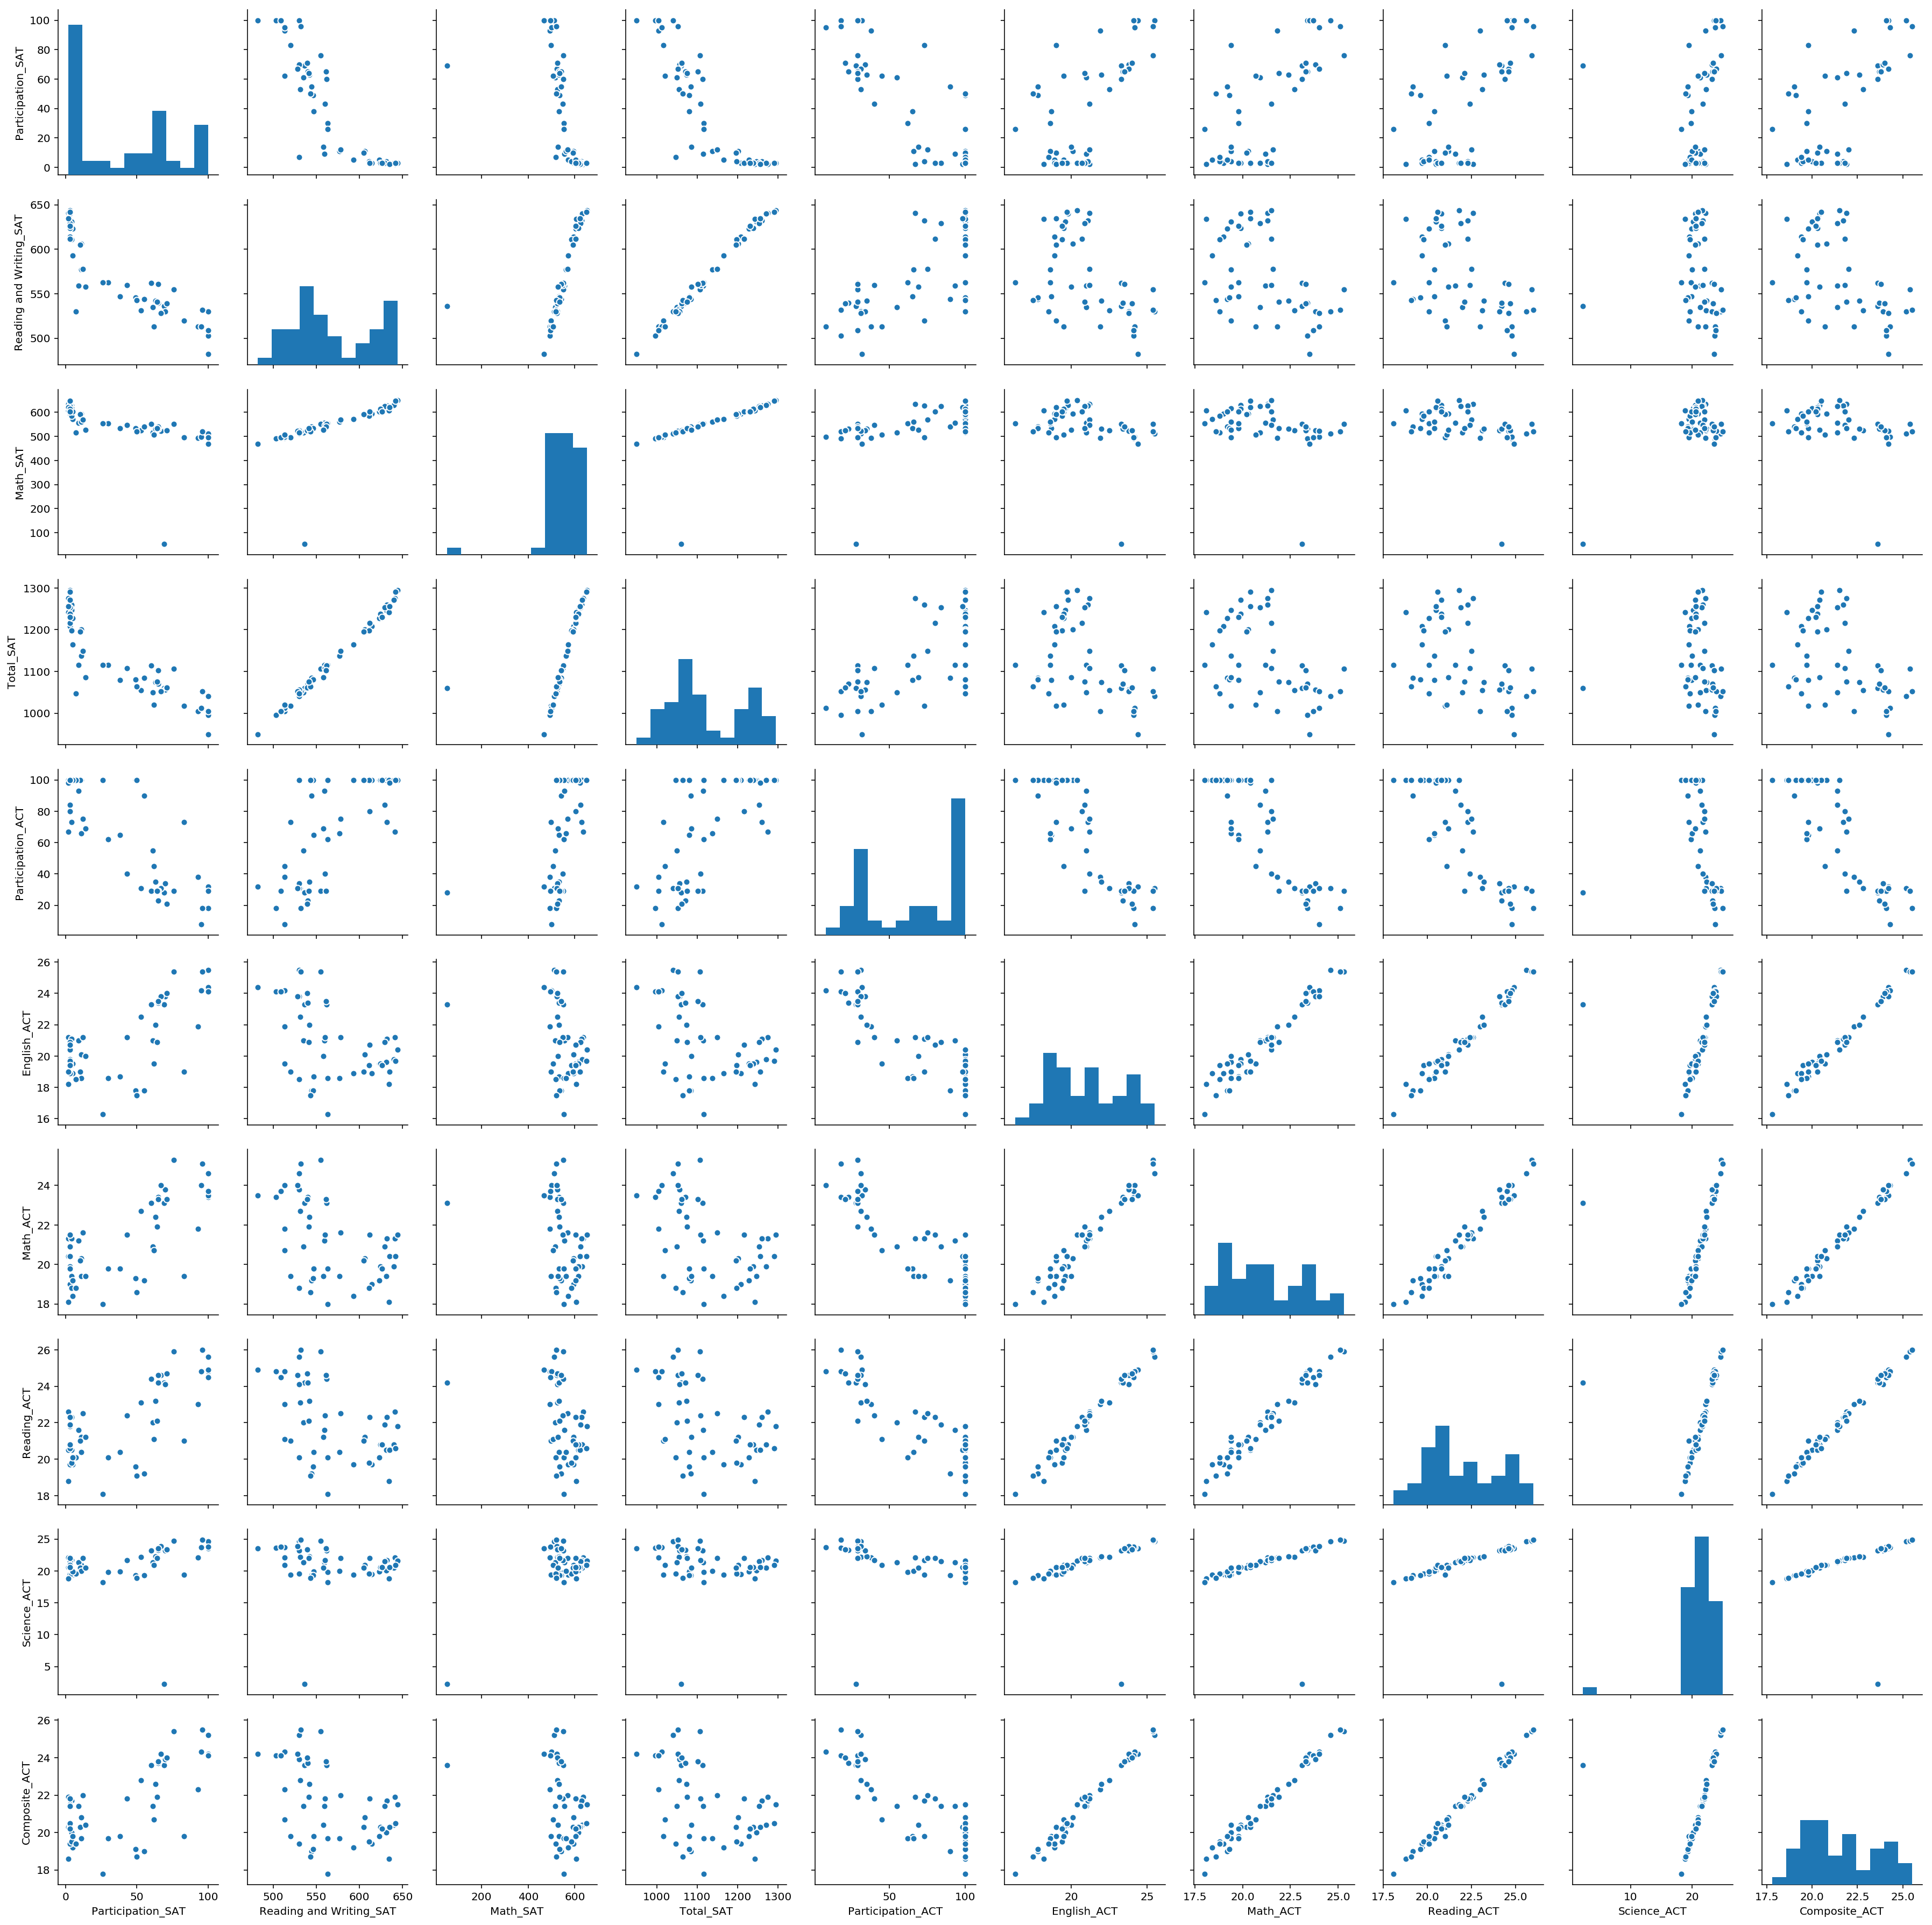

In [38]:
sns.pairplot(tests[tests.columns[1:]]);

##### 22. Are there any interesting relationships to note?

##### 23. Create box plots for each variable. 

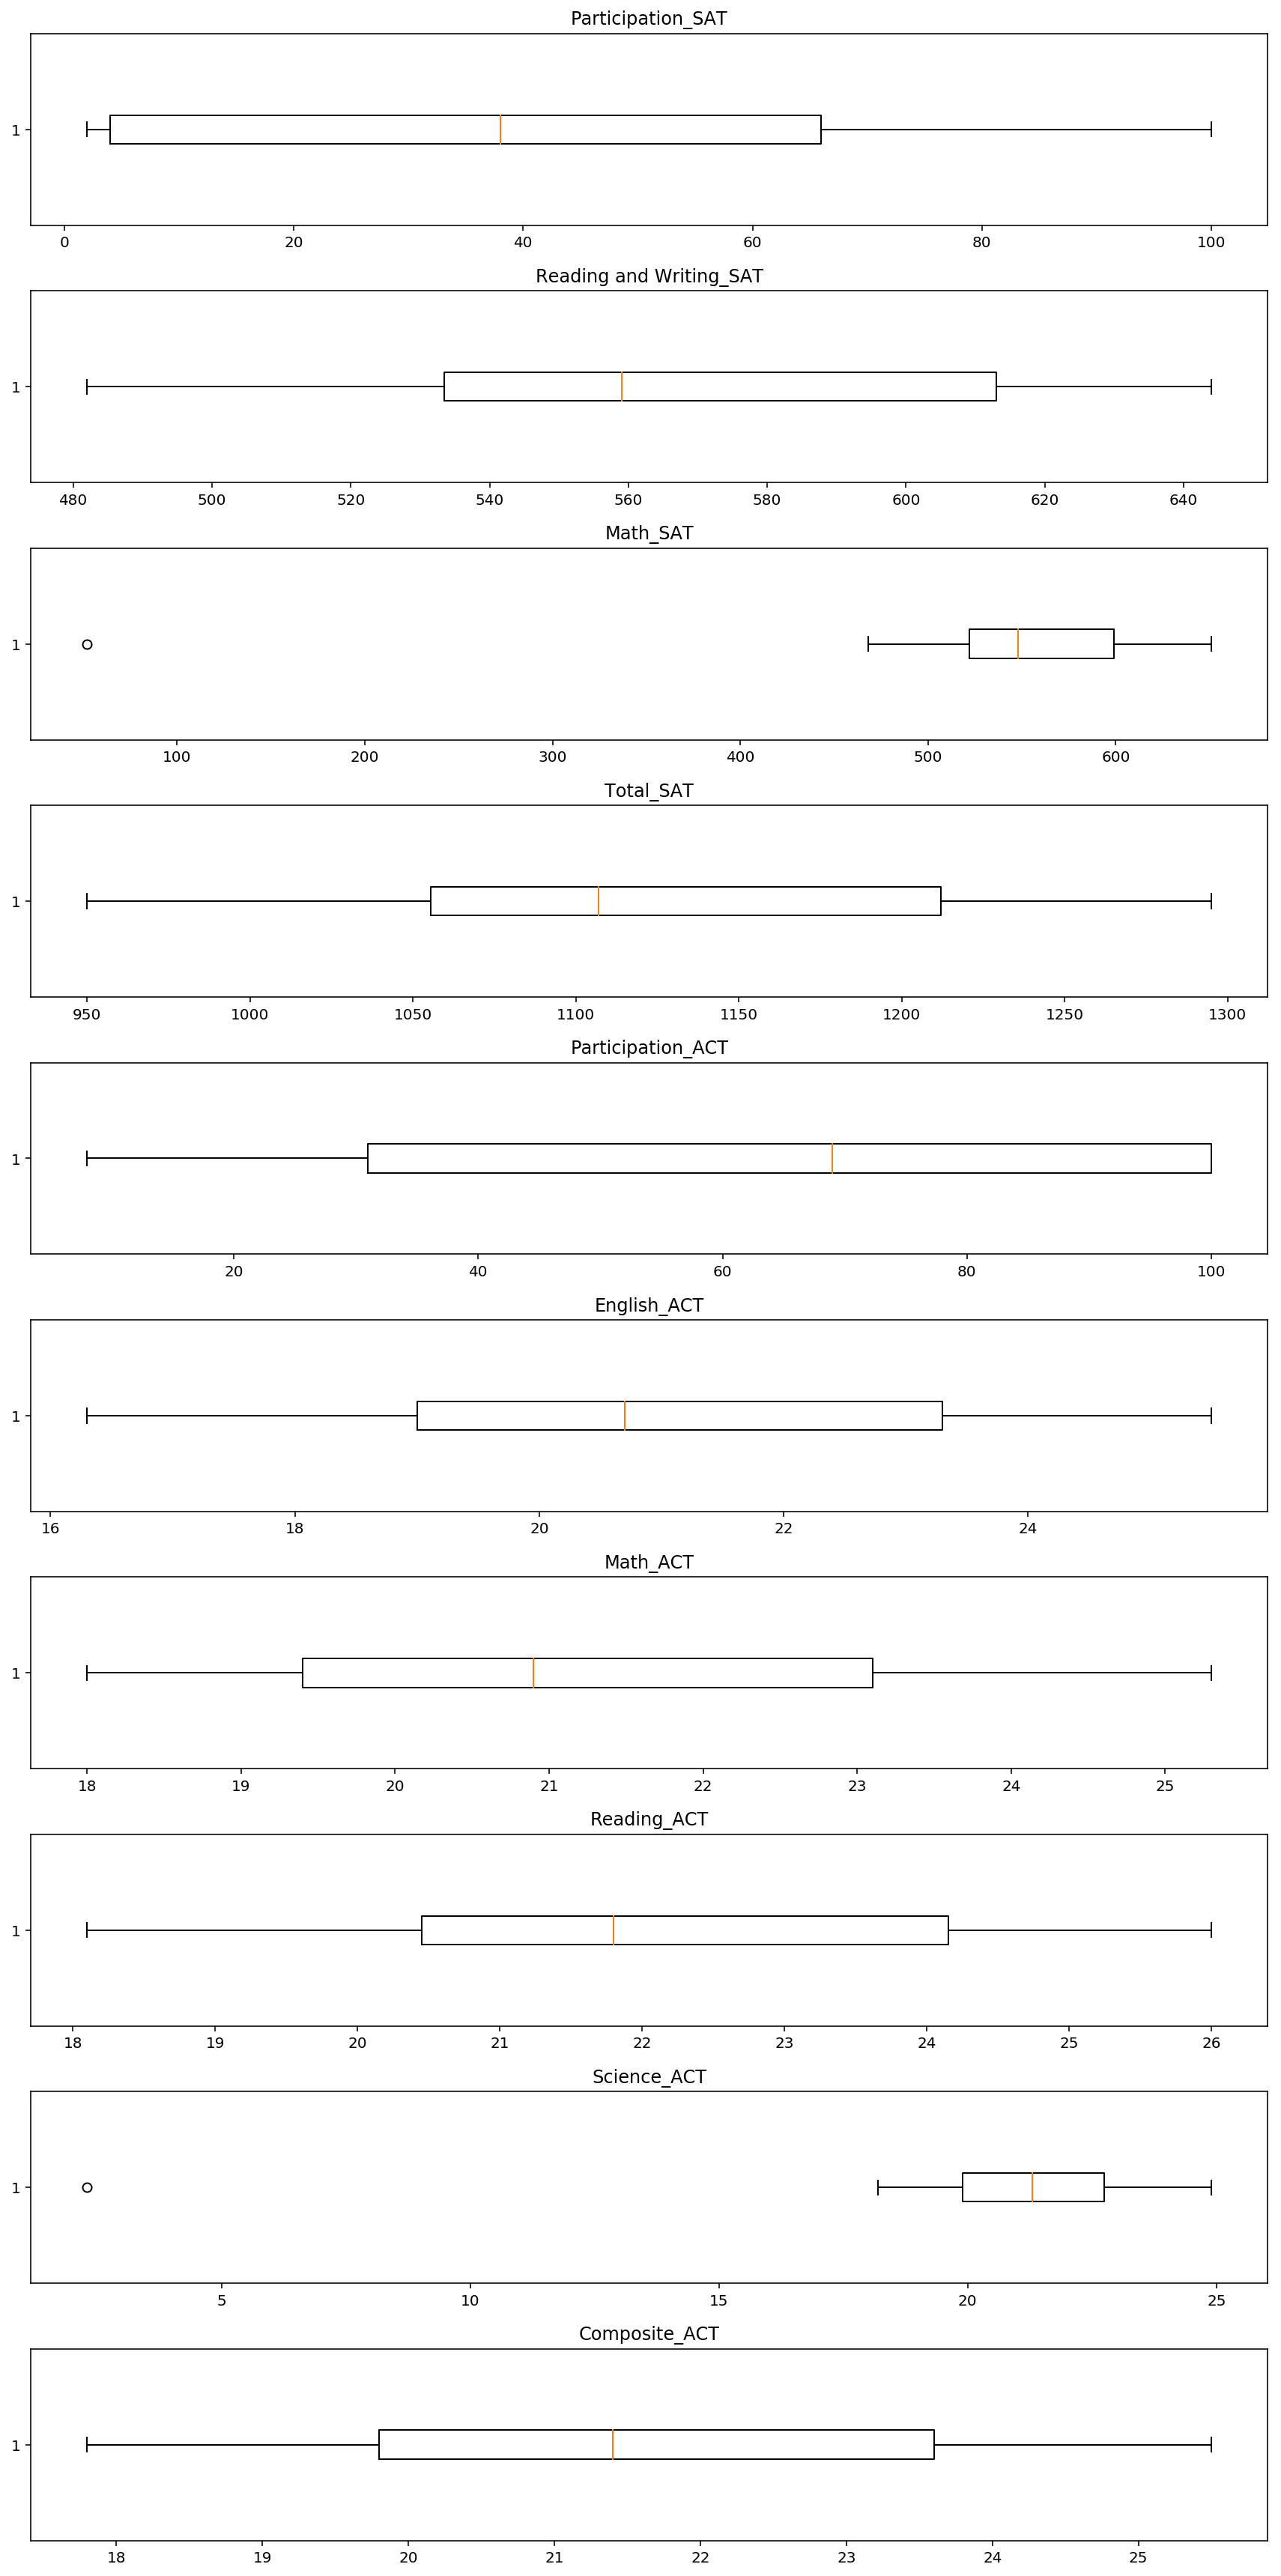

In [39]:
num_plots = len(tests.columns[1:])
fig, axes = plt.subplots(num_plots, 1, figsize=(12,24))
for num, col in enumerate(tests.columns[1:]):
    axes[num].boxplot(x=tests[col],vert=False)
    axes[num].set_title(col)
    
plt.tight_layout()


In [40]:
tests[['Math_SAT','Science_ACT']].min()

Math_SAT       52.0
Science_ACT     2.3
dtype: float64

In [41]:
# Is Maryland really that dumb?

tests.loc[tests['State'] == 'Maryland',['Math_SAT','Science_ACT']]

,Math_SAT,Science_ACT
20,52.0,2.3


In [42]:
# It looks like these values are one tenth of the mean:

tests[['Math_SAT','Science_ACT']].mean()

Math_SAT       547.627451
Science_ACT     21.041176
dtype: float64

In [43]:
# They've probably been messed with by a malicious co-instructor.
# Lets correct them:

tests.loc[tests['State'] == 'Maryland',['Math_SAT','Science_ACT']] = tests.loc[
    tests['State'] == 'Maryland',['Math_SAT','Science_ACT']] * 10

In [44]:

# We may re-run our box plots if we like:# We ma 

# num_plots = len(tests.columns[1:])
# fig, axes = plt.subplots(num_plots, 1, figsize=(12,24))
# for num, col in enumerate(tests.columns[1:]):
#     axes[num].boxplot(x=tests[col],vert=False)
#     axes[num].set_title(col)
    
# plt.tight_layout()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [54]:
#don't know tableau

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [45]:
import scipy.stats as stats

def cent_shape_spread(series):
    return(series.mean(), series.std(), stats.skew(series))

dist_dict = {}
dist_dict['Parameter'] = ['Mean','Standard Deviation','Skewness']
for col, rows in tests.loc[:, tests.dtypes == float].iteritems():
    dist_dict[col] = (cent_shape_spread(rows))
    
description_df = pd.DataFrame(dist_dict)
description_df.set_index('Parameter')

,Composite_ACT,English_ACT,Math_ACT,Math_SAT,Participation_ACT,Participation_SAT,Reading and Writing_SAT,Reading_ACT,Science_ACT,Total_SAT
Parameter,,,,,,,,,,
Mean,21.519608,20.931373,21.182353,556.803922,65.254902,39.803922,569.117647,22.013725,21.447059,1126.098039
Standard Deviation,2.020695,2.353677,1.981989,47.180513,32.140842,35.276632,45.666901,2.067271,1.735552,92.494812
Skewness,0.310326,0.342202,0.322817,0.355110,-0.192118,0.336175,0.264607,0.261378,0.214266,0.301683


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [ ]:
# ## "Average ACT scores by state are about 21.5. State ACT Reading scores are higher than average, indicating that it is the subject test at which states generally perform most well. ACT Science and Math scores are closer to average, while English scores are the the lowest, indicating it is the subject test with the lowest student performance, generally, although it is the ACT subject test with the highest variability: ACT English standard deviation is 2.35 compared to ACT average standard deviation of about 2.02. ACT Science scores, on the other hand, display the lowest variance.

# The nationwide average SAT score in 2017 was 1126. Of the two SAT subject tests, states tend to perform about 12 points higher on the Reading and Writing test, with an average score of 569 compared to 557. But with standard deviation of 46 and 47 for the two SAT subject tests respectively, the difference between SAT subject test scores is minuscule and probably not worth analyzing.

# When it comes to skew, the SAT and ACT scores are all uniformly skewed right, with positive values of skewness ranging from .212 (ACT Science) on the low end to .354 (SAT Math). This indicates that there are more high-scoring outliers on both tests than low-scoring outliers: we don't observe any states doing exceptionally bad. It also indicates that SAT Math is the 'nerdiest' test (my terminology), or it is the test that produces the most high-scoring outliers. Some states teach Math much better than others!

# ACT Science is boring in all regards. Its mean value is close to the mean value of all ACT subject tests, it has low spread, so state scores don't vary much, and there are few outliers.

# Mean participation rate is about 65% for the ACT, while it is about 40% for the SAT, with fairly similar standard deviations. We should remember that our basic observational units are states, however: if the states that tend to participate highly in the SAT are populous (and ACT states less populous), it may be that more students took the SAT in 2017 than the ACT. We would need state-by-state population data to know for sure. Interestingly, the skewness of state SAT participation rate is positive. There are a few state outliers with very high SAT participation rates; a few of these states even require student participation in the SAT. ACT participation, on the other hand, has negative skew, indicating more states falling below the mean in ACT participation. These states are states to target!"

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [46]:
#We could use the ttest_ind function from scipy's stats module, 
#but this assumes we are working with two independent samples. Since ACT and SAT participation rates are clearly 
#not independent, we should not use this test. Instead, we'll use the matched pairs t-test to 
#test the null hypothesis that the difference between the two population means is zero:

from scipy import stats

In [47]:
tests[['Participation_SAT','Participation_ACT']].mean()

Participation_SAT    39.803922
Participation_ACT    65.254902
dtype: float64

In [48]:
stats.ttest_rel(tests['Participation_SAT'], tests['Participation_ACT'])

Ttest_relResult(statistic=-2.8095519783707879, pvalue=0.0070619284220823902)

In [49]:
##As you can see, mean ACT participation rate is higher. Therefore, we're not surprised to see a negative test statistic. With a p-value of .007, we can reject the null hypothesis at the $\alpha = 0.05$ level 
#and conclude that the average participation rates of ACT and SAT tests are in fact different.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [50]:
# Borrowed from the statistical inference lab:

def ci_2(df,conf_level, name=''):
    z_star = stats.norm.ppf((conf_level + 1)/2, loc=0, scale=1)
    sample_mean = df.mean()
    sigma = df.std()
    n = len(df)

    low_end = sample_mean - z_star * sigma / n ** 0.5
    high_end = sample_mean + z_star * sigma / n ** 0.5
    
    return ("We are 95% confident that the true mean of" + name + " is between " + str(round(low_end,2)) + " and " + str(round(high_end,2)) + ".")

In [51]:
ci_2(tests['Participation_SAT'], .05, name=" SAT participation rate")

'We are 95% confident that the true mean of SAT participation rate is between 39.49 and 40.11.'

In [52]:
ci_2(tests['Participation_ACT'], .05, name=" ACT participation rate")

'We are 95% confident that the true mean of ACT participation rate is between 64.97 and 65.54.'

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [53]:
#Not at all! The hypothesis test said that the two means are very likely to be unequal. Given that, I would expect the range of likely values for each variable to different (ie, non-overlapping).

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [ ]:
# Yes! Why wouldn't it be? We can speculate that they are caused by the same underlying process: namely, 
# state-by-state educational performance in math. But there are surprising results.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [ ]:
# First of all, we can and should perform descriptive statistics, or exploratory data analysis. That amounts to examining the distribution of each of our variables, looking for outliers or interesting observations, and visually identifying trends.

# Whether or not we should perform inferential statistics on our data depends on whether we can meaningfully identify a population or populations of interest and whether we believe our data represents a reasonable sample (or samples) from that population (or populations).

# On the whole, it doesn't make sense to perform inferential statistics on our data. That's because our data already contains observations of state-level performance for every state (and DC) in the country. That is, for variables in our dataset, we already have access to the entire population of interest.

# Attempting to treat our data as a sample of some hypothetical population of interest -- long-term state-by-state educational performance, say, or performance of high school students globally -- will inevitably expose us to sampling bias, since our sample is not representative of those populations.

# TL;DR: Given that our observational units are state averages, we are missing no data, so there is no 'distance' between our sample and some target population. Therefore it is silly to do inferential statistics.